In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
df = pd.read_csv('./Data/ramadan_supply_chain_costs.csv')
df.head(
)

,days,city_population,temperature,fuel_price,n_deliveries,is_friday,days_until_eid,demand_interaction,weather_disruption_flag,supply_chain_cost
0,1,4260672,29.406789,3.811064,25.0,0,29,106516800.0,0,15054.262875
1,2,4260672,21.575446,3.879285,15.0,0,28,63910080.0,0,10765.779509
2,3,4260672,42.630861,3.961523,89.0,0,27,379199808.0,1,42350.926350
3,4,4260672,44.517053,2.904946,47.0,0,26,200251584.0,1,24928.852752
4,5,4260672,34.513584,3.922381,61.5,1,25,262031328.0,0,31402.627142


In [3]:
X = df[['city_population','temperature','fuel_price','n_deliveries','is_friday','days_until_eid','demand_interaction','weather_disruption_flag']]
y = df['supply_chain_cost']

In [4]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [5]:
model.coef_

array([ 3.42544184e-03, -5.53046368e+01, -6.90575920e+01,  2.01060979e+02,
       -1.02993226e+03,  6.24906075e+01,  2.15714193e-05,  1.17486528e+03])

In [6]:
model.intercept_

-4739.5390468116275

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


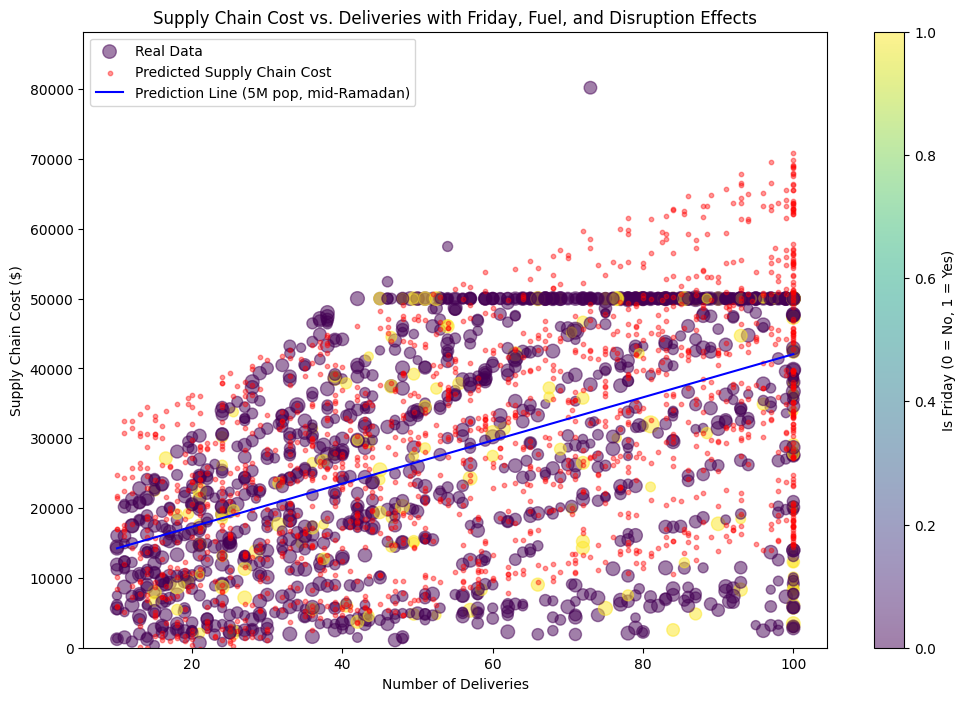

In [7]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df["n_deliveries"],
    df["supply_chain_cost"],
    c=df["is_friday"],
    s=df["fuel_price"] * 20,
    alpha=0.5,
    cmap="viridis",
    label="Real Data"
)
plt.scatter(
    df["n_deliveries"],
    model.predict(X),
    color="red",
    s=10,
    label="Predicted Supply Chain Cost",
    alpha=0.4
)
deliveries_range = np.linspace(10, 100, 100)
X_line = np.array([np.full(100, 5e6), np.full(100, 35), np.full(100, 3.5), deliveries_range, np.zeros(100), np.full(100, 15), np.full(100, 5e6) * deliveries_range, np.zeros(100)]).T
plt.plot(deliveries_range, model.predict(X_line), "b-", label="Prediction Line (5M pop, mid-Ramadan)")
plt.xlabel("Number of Deliveries")
plt.ylabel("Supply Chain Cost ($)")
plt.title("Supply Chain Cost vs. Deliveries with Friday, Fuel, and Disruption Effects")
plt.colorbar(scatter, label="Is Friday (0 = No, 1 = Yes)")
plt.legend()
plt.ylim(0, max(df["supply_chain_cost"]) * 1.1)
plt.show()